### Your name:

<pre> Nitin Prakash Panicker </pre>

### Collaborators:

<pre> </pre>


In [102]:
import numpy as np
import pandas as pd
import seaborn as sns

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# To make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Classification

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- Set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as in week 2 (End-to-end Machine Learning Project). Remember Appendix B.
- Study the ROC Curve and decide on a threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {3, 4, 6, 7, 10, 20, 50, 100} 
    - KNN Classfier 
        - tune only: n_neighbors: {3, 4, 5, 7, 10, 20, 50} 
    - Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 4-folds

- Other paramenters -> Use default

In [103]:
data_df = pd.read_excel("default of credit card clients.xls", 
                   skiprows=1, header=0)

In [104]:
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [105]:
data_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [106]:
print(f"Features are: {', '.join(data_df.columns.values)}")

Features are: ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default payment next month


In [107]:
# Let's check for missing and/or anamolous data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [108]:
data_df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


There are no missing data points, however, there are a few mysterious undefined data points: 

EDUCATION has category 5 and 6 that are unlabelled, also the category 0 is undefined.
MARRIAGE has a label 0 that is undefined,

In [109]:
data_df = data_df.rename(columns={'default payment next month': 'default_payment_next_month'})
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


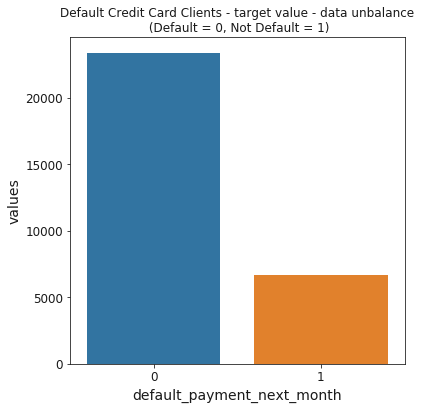

In [110]:
# Let's check data imbalance with respect with target value, i.e. default.payment.next.month
temp = data_df["default_payment_next_month"].value_counts()
df = pd.DataFrame({'default_payment_next_month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default_payment_next_month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

About 6,636 out of 30,000 (or 22%) of clients will default next month. 
The data does not have a huge imbalance with respect to the target value (default_payment_next_month).

In [111]:
# Payment delay description
data_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


There seems to be an undefined label -2. 
1,2,3 ... are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0. 

In [112]:
# Bill Statement description
data_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Negative values in the bill statement will be considered as Credit. 

In [113]:
#Previous Payment Description
data_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [114]:
data_df = data_df.rename(columns={'PAY_0': 'PAY_1'})
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


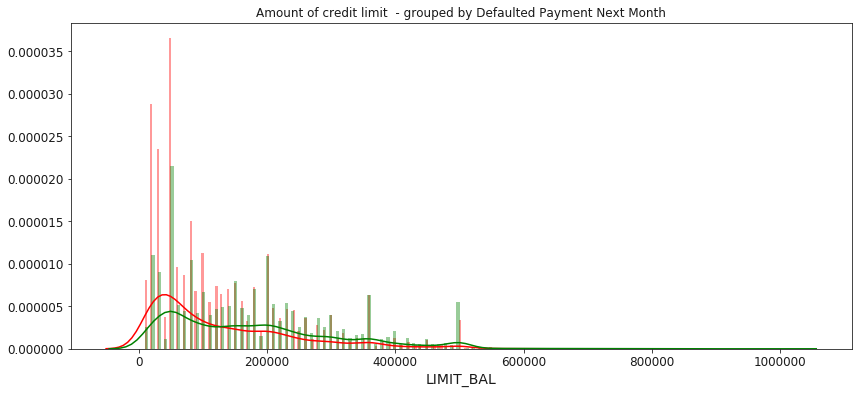

In [115]:
# Credit limit amount grouped by payment defaulted in the next month - Density plot
class_0 = data_df.loc[data_df['default_payment_next_month'] == 0]["LIMIT_BAL"]
class_1 = data_df.loc[data_df['default_payment_next_month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit  - grouped by Defaulted Payment Next Month')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

Majority defaults are for credit limits 0-100,000, with the largest number of defaults for the amounts of 50,000, 20,000 and 30,000.

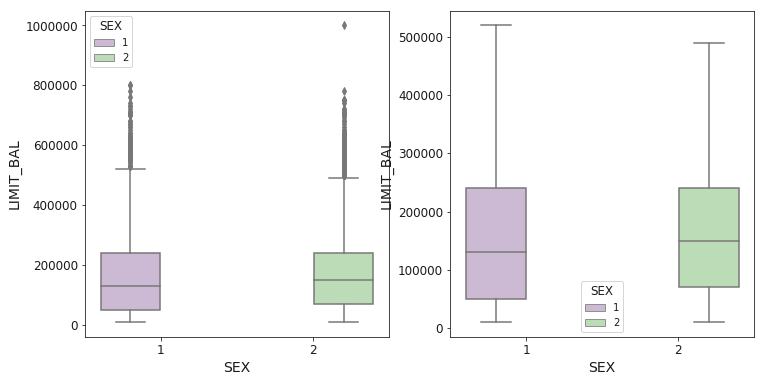

In [116]:
# Observing Credit limit Vs Sex
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=False)
plt.show();


The limit credit amount is quite balanced between sexes. 

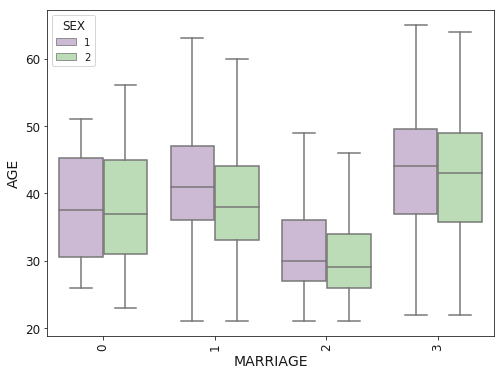

In [117]:
# Let us explore Sex, Education, Age and Marriage features

def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data_df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();
    
boxplot_variation('MARRIAGE','AGE', 'SEX',8)    

Marriage status definition:
0 : unknown
1 : married
2 : single
3 : others

Status 3 has mean values over 40 years and Q4 values over 60 years - this would mean mostly widowed or divorced. 
For status 0 (unknown), Q1 values are above Q1 values for married (status 1) in the case of both sexes.

Married males have mean age above married women. 
Unmarried males have mean age above unmarried women. Q3 and Q4 values for married men are above corresponding values for married women.

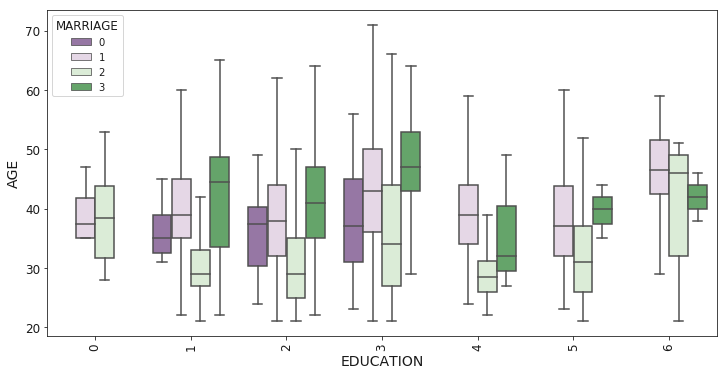

In [118]:
# Age distribution grouped by education and marriage status

boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

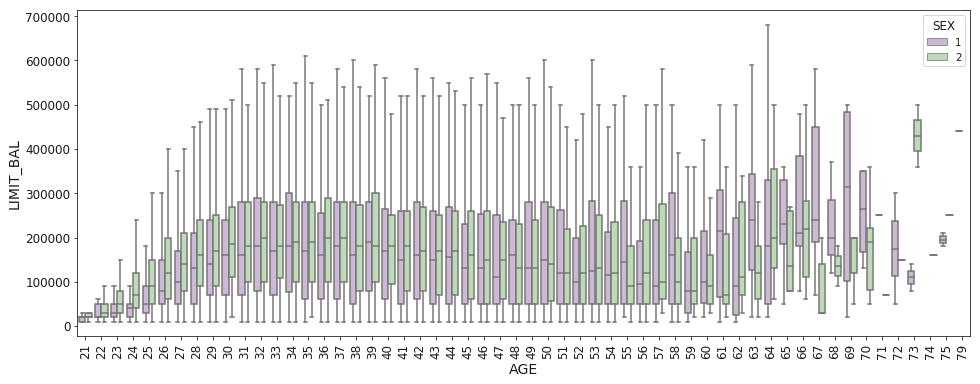

In [119]:
# Credit limit distribution grouped by age and sex. 

boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

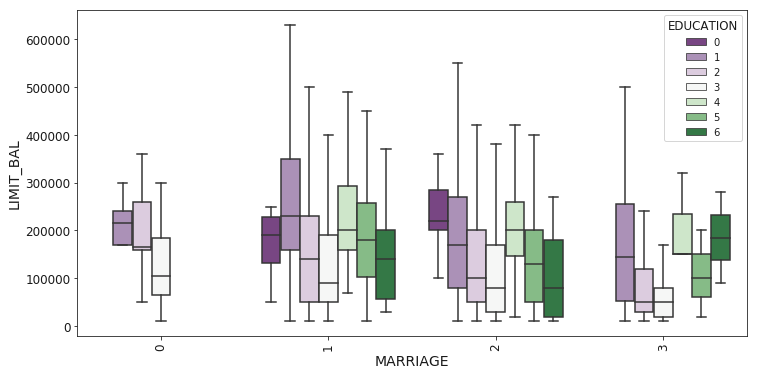

In [120]:
# Credit limit distribution grouped by marriage status and education level
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

### Predictive modeling 

In [121]:
# RandomForestClassifier with OneHotEncoding for the categorical variables

# Initialising the RandomForestClassifier: 

clf = RandomForestClassifier(n_jobs=4, 
                             random_state=123,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)



In [122]:
# Split data into training and validation sets
train_df, val_df = train_test_split(data_df, test_size=0.20, random_state=123, shuffle=True )

#train_df_bkp = train_df.copy()
#val_df_bkp = val_df.copy()


In [123]:
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

train_f_df = pd.get_dummies(train_df, columns = cat_features)
val_f_df = pd.get_dummies(val_df, columns = cat_features)


In [124]:
train_f_df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
19682,19683,200000,46,106651,103173,104137,103422,95206,65108,3692,...,0,0,1,0,0,0,0,0,0,0
11062,11063,120000,32,3556,326,326,476,802,326,652,...,0,0,0,1,0,0,0,0,0,0
197,198,20000,22,18553,19446,19065,8332,18868,19247,1500,...,0,0,1,0,0,0,0,0,0,0
23620,23621,100000,34,91674,91348,87244,23181,7721,3219,5004,...,0,1,0,0,0,0,0,0,0,0
26031,26032,290000,29,7324,8174,8389,8770,9145,10016,1130,...,0,0,1,0,0,0,0,0,0,0


In [125]:
val_f_df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
25665,25666,40000,26,28991,24391,13600,0,44024,18697,1300,...,0,0,0,1,0,0,0,0,0,0
16464,16465,80000,59,75662,70073,53169,50875,50372,49470,3212,...,0,0,0,1,0,0,0,0,0,0
22386,22387,170000,30,155910,158819,161487,157577,168094,170922,6800,...,0,0,0,0,1,0,0,0,0,0
10149,10150,200000,41,23570,735,0,0,0,0,742,...,0,1,0,0,0,0,0,0,0,0
8729,8730,50000,43,8214,8034,9044,9225,9417,9617,1140,...,0,0,0,1,0,0,0,0,0,0


Because the train and validation datasets do not have the same number of columns, we will have to align them.

In [126]:
train_fa_df, val_fa_df = train_f_df.align(val_f_df, join='outer', axis=1, fill_value=0)

In [127]:
train_fa_df.head(5)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,...,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default_payment_next_month
19682,46,106651,103173,104137,103422,95206,65108,0,0,1,...,0,3692,5000,3300,2500,2930,1500,0,1,0
11062,32,3556,326,326,476,802,326,0,1,0,...,0,652,326,476,802,0,326,0,1,1
197,22,18553,19446,19065,8332,18868,19247,0,1,0,...,0,1500,1032,541,20000,693,1000,0,1,0
23620,34,91674,91348,87244,23181,7721,3219,0,0,0,...,0,5004,3811,3002,4000,3219,1864,0,1,0
26031,29,7324,8174,8389,8770,9145,10016,0,0,1,...,0,1130,1502,1300,500,1000,1001,0,1,0


In [128]:
val_fa_df.head(5)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,...,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default_payment_next_month
25665,26,28991,24391,13600,0,44024,18697,0,0,1,...,0,1300,1000,0,22373,680,10000,0,1,0
16464,59,75662,70073,53169,50875,50372,49470,0,0,0,...,0,3212,2106,2000,1603,1903,2006,0,1,0
22386,30,155910,158819,161487,157577,168094,170922,0,1,0,...,0,6800,6500,0,13000,5500,1000,0,1,1
10149,41,23570,735,0,0,0,0,0,0,1,...,0,742,0,0,0,0,0,0,1,1
8729,43,8214,8034,9044,9225,9417,9617,0,0,1,...,0,1140,1150,331,341,356,330,1,0,0


In [129]:
target_f = 'default_payment_next_month'
predictors_f = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'EDUCATION_0', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'LIMIT_BAL', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_-2', 'PAY_1_0',
       'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6',
       'PAY_1_7', 'PAY_1_8', 'PAY_2_-1', 'PAY_2_-2', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-1', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-1', 'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1',
       'PAY_5_-2', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_-2', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2']

### Training RandomForestClassifier using train_fa_df set

In [130]:
clf.fit(train_fa_df[predictors_f], train_df[target_f].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=123, verbose=False,
            warm_start=False)

Predicting target values for val_fa_df dataset

In [131]:
preds = clf.predict(val_fa_df[predictors_f])

In [132]:
preds

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [133]:
preds.shape

(6000,)

### Feature Importance

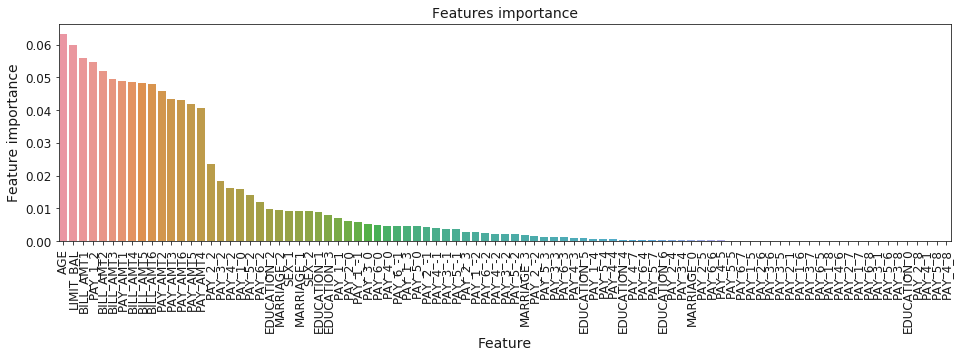

In [134]:
tmp = pd.DataFrame({'Feature': predictors_f, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Looking at the above plot, the most important features are determined to be Age, Limit_bal, Bill_amt1, Pay_0_2, Bill_amt2, bill_amt3

### Confusion matrix and Area Under Curve (Receiver operator characteristics) 

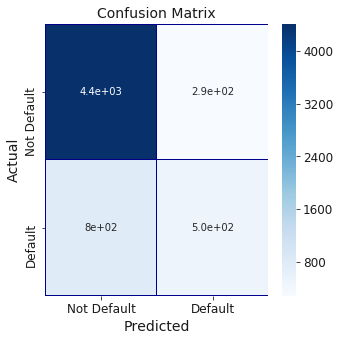

In [135]:
cm = pd.crosstab(val_fa_df[target_f].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [136]:
roc_auc_score(val_fa_df[target_f].values, preds)

0.6631835212842675

### KNearestNeighbours

In [137]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_fa_df[predictors_f], train_df[target_f].values )


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [138]:
y_pred = knn.predict(val_fa_df[predictors_f])


In [139]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
y_pred.shape

(6000,)

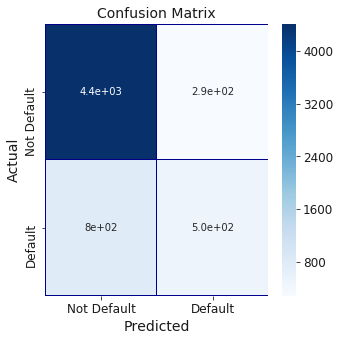

In [141]:
cm1 = pd.crosstab(val_fa_df[target_f].values, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Cross validation with 4 folds

In [144]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [ ]:
skfolds = StratifiedKFold(n_splits=4, random_state=123)
for train_index, test_index in skfolds.split(train_fa_df[predictors_f],train_df[target_f].values):
    clone_clf = clone(clf)
    X_train_folds = train_fa_df[train_index]
    y_train_folds = (train_df[train_index])
    X_test_fold = train_fa_df[test_index]
    y_test_fold = (train_df[test_index])
    
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

### Conclusions

Explain your results and choices.

RandomForestClassifier gave an accuracy of 66.31%
KNearestNeighbours gave us an accuracy of 75%


Q2. (Optional) Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion. 